<a href="https://colab.research.google.com/github/afullhart/climateanalogs/blob/main/Figures/Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
%reset -f

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install rioxarray
!pip install cartopy

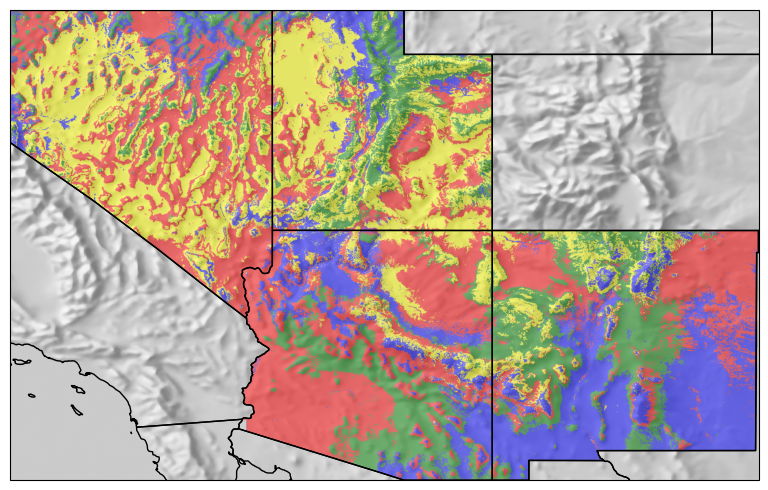

In [36]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.image import imread
import rioxarray as xr
import cartopy.crs as ccrs
import cartopy
import PIL
from PIL import Image
PIL.Image.MAX_IMAGE_PIXELS = None
import numpy as np

isof ='/content/drive/My Drive/Colab Notebooks/Analogs/IsoCluster.tif'
'https://www.naturalearthdata.com/downloads/10m-raster-data/10m-manual-shaded-relief/'
fname = '/content/drive/My Drive/Colab Notebooks/Analogs/US_MSR_ProjectRaster.tif'

image = Image.open(fname).convert('L')
arr = np.asarray(image)

im = xr.open_rasterio(isof)
lon_min = im.rio.bounds()[0]
lat_min = im.rio.bounds()[1]
lon_max = im.rio.bounds()[2]
lat_max = im.rio.bounds()[3]
im = im[0].where(im[0] > 0, np.nan)


colors = ['red', 'green', 'blue', 'yellow', 'red', 'green', 'blue', 'yellow', 'red', 'green', 'blue', 'yellow', 'red', 'green', 'blue']
cmap = mcolors.ListedColormap(colors)

fig, ax = plt.subplots(figsize=(8, 5), subplot_kw={'projection': ccrs.PlateCarree()})
fig.tight_layout()

ax.set_extent([-120, -102.991, 31.333, 42.008])
ax.add_feature(cartopy.feature.STATES, linewidth=1)
#ax.imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
#          extent=[-134.030437, -51.988941, 5.977019, 56.007958])
ax.imshow(arr, origin='upper', transform=ccrs.PlateCarree(), cmap='gray', vmin=0, vmax=255,
          extent=[-134.030437, -51.988941, 5.977019, 56.007958])

ax.imshow(im,
          extent=[lon_min, lon_max, lat_min, lat_max],
          origin='upper',
          vmin=1,
          vmax=15,
          alpha=0.50,
          cmap=cmap)




In [16]:
print(cartopy.crs.CRS)

<class 'cartopy.crs.CRS'>
